- import Module and datasets

In [65]:
import pandas as pd
import numpy as np
import os
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rohitgrewal/electricity-demand-data-dsl")

dir = os.path.join(path, os.listdir(path)[0])
df = pd.read_csv(dir)

Using Colab cache for faster access to the 'electricity-demand-data-dsl' dataset.


In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
warnings.filterwarnings('ignore')

In [67]:
df

,Timestamp,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
0,01-Jan-20,0.0,2.0,1.0,2020.0,1.0,3.000000,61.288951,2457.119872
1,01-Jan-20,1.0,2.0,1.0,2020.0,1.0,3.000000,52.873702,2269.904712
2,01-Jan-20,2.0,2.0,1.0,2020.0,1.0,4.244482,36.341783,2215.640403
3,01-Jan-20,3.0,2.0,1.0,2020.0,1.0,3.000000,72.629378,2174.232413
4,01-Jan-20,4.0,2.0,1.0,2020.0,1.0,3.881208,90.582444,2472.453006
...,...,...,...,...,...,...,...,...,...
43843,31-Dec-24,19.0,1.0,12.0,2024.0,366.0,3.956838,43.287161,4689.693109
43844,31-Dec-24,20.0,1.0,12.0,2024.0,366.0,3.118824,51.705756,4331.249224
43845,31-Dec-24,21.0,1.0,12.0,2024.0,366.0,3.000000,40.565916,4015.979957
43846,31-Dec-24,22.0,1.0,12.0,2024.0,366.0,3.000000,51.998107,3353.241682


In [68]:
df.shape

(43848, 9)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43848 entries, 0 to 43847
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Timestamp    43848 non-null  object 
 1   hour         43837 non-null  float64
 2   dayofweek    43839 non-null  float64
 3   month        43840 non-null  float64
 4   year         43843 non-null  float64
 5   dayofyear    43843 non-null  float64
 6   Temperature  43841 non-null  float64
 7   Humidity     43838 non-null  float64
 8   Demand       43841 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.0+ MB


In [70]:
df[["Temperature",	"Humidity"	,"Demand"]].describe()

,Temperature,Humidity,Demand
count,43841.000000,43838.000000,43841.000000
mean,25.067788,59.903007,5000.790976
std,12.821725,18.342604,1412.527409
min,3.000000,20.000000,1611.954020
25%,15.210186,46.241224,4015.668472
50%,25.003212,59.986720,5013.053367
75%,34.740971,73.796820,6000.803082
max,50.000000,95.000000,11910.705100


In [71]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [72]:
df.set_index("Timestamp", inplace=True)

In [73]:
df.isnull().sum()

,0
hour,11
dayofweek,9
month,8
year,5
dayofyear,5
Temperature,7
Humidity,10
Demand,7


In [74]:
df[df.isna().any(axis=1)]

,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
Timestamp,,,,,,,,
2020-04-30,NaN,3.0,4.0,2020.0,121.0,21.820261,41.353675,5393.127681
2020-07-21,NaN,1.0,7.0,2020.0,203.0,36.555833,62.779665,6248.349423
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-27,NaN,5.0,2.0,2021.0,58.0,24.001003,53.303268,4523.253789
2021-12-13,23.0,0.0,12.0,2021.0,NaN,3.000000,75.457130,3225.225822
2021-12-14,NaN,1.0,12.0,2021.0,348.0,5.061319,47.215825,2887.848612


In [75]:
df[df.isna().all(axis=1)]

,hour,dayofweek,month,year,dayofyear,Temperature,Humidity,Demand
Timestamp,,,,,,,,
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
df.dropna(how='all', inplace=True)

In [77]:
df.isnull().sum()

,0
hour,7
dayofweek,5
month,4
year,1
dayofyear,1
Temperature,3
Humidity,6
Demand,3


In [78]:
df.columns

Index(['hour', 'dayofweek', 'month', 'year', 'dayofyear', 'Temperature',
       'Humidity', 'Demand'],
      dtype='object')

- Missing data handling

In [79]:
df[['hour', 'dayofweek', 'month', 'year', 'dayofyear']] = df[['hour', 'dayofweek', 'month', 'year', 'dayofyear']].ffill()

In [80]:
df[['Temperature', 'Humidity']] = df[['Temperature', 'Humidity']].bfill()

In [81]:
df['Demand'].interpolate(method='time', inplace=True)

- Feature Engineering

In [82]:
df.columns

Index(['hour', 'dayofweek', 'month', 'year', 'dayofyear', 'Temperature',
       'Humidity', 'Demand'],
      dtype='object')

In [83]:
df.insert(5, 'quarter', df.index.quarter )

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43844 entries, 2020-01-01 to 2024-12-31
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour         43844 non-null  float64
 1   dayofweek    43844 non-null  float64
 2   month        43844 non-null  float64
 3   year         43844 non-null  float64
 4   dayofyear    43844 non-null  float64
 5   quarter      43844 non-null  int32  
 6   Temperature  43844 non-null  float64
 7   Humidity     43844 non-null  float64
 8   Demand       43844 non-null  float64
dtypes: float64(8), int32(1)
memory usage: 3.2 MB


In [85]:
df[['hour', 'dayofweek', 'month', 'year', 'dayofyear']] = df[['hour', 'dayofweek', 'month', 'year', 'dayofyear']].astype(int)

In [90]:
df.sample(15)

,hour,dayofweek,month,year,dayofyear,weekofyear,quarter,Temperature,Humidity,Demand
Timestamp,,,,,,,,,,
2023-02-05,20,6,2,2023,36,5,1,8.879826,59.954710,4324.201862
2022-05-20,12,4,5,2022,140,20,2,46.220921,41.322717,6460.141839
2021-08-26,9,3,8,2021,238,34,3,36.219943,77.078639,6456.518666
2021-09-10,11,4,9,2021,253,36,3,41.277053,85.710541,5726.876924
2020-09-24,3,3,9,2020,268,39,3,19.946389,75.090259,3316.380850
2024-08-18,4,6,8,2024,231,33,3,31.841519,87.051471,4172.266119
2021-10-06,3,2,10,2021,279,40,4,17.031507,94.859616,3198.768356
2020-04-30,19,3,4,2020,121,18,2,31.368241,34.153735,6241.050870
2022-12-21,2,2,12,2022,355,51,4,3.000000,64.569699,2313.391192


In [87]:
df.insert(5, 'weekofyear', df.index.isocalendar().week.astype(int))

In [104]:
 df.index.isocalendar().week

,week
Timestamp,
2020-01-01,1
2020-01-01,1
2020-01-01,1
2020-01-01,1
2020-01-01,1
...,...
2024-12-31,1
2024-12-31,1
2024-12-31,1


In [96]:
df.insert(7, 'is_weekend', df.index.dayofweek.isin([5,6]))

In [95]:
pd.Series(df.index.dayofweek.isin([5,6])).value_counts()

,count
False,31320
True,12524


In [102]:
df.sample(15)

,hour,dayofweek,month,year,dayofyear,weekofyear,quarter,is_weekend,Temperature,Humidity,Demand
Timestamp,,,,,,,,,,,
2024-03-01,20,4,3,2024,61,9,1,0,9.581125,28.260782,4850.547435
2023-02-04,17,5,2,2023,35,5,1,1,16.143453,45.352864,4930.626621
2021-04-23,22,4,4,2021,113,16,2,0,19.545736,25.346626,4064.835298
2024-05-02,6,3,5,2024,123,18,2,0,34.365842,55.390530,6087.111390
2021-09-26,17,6,9,2021,269,38,3,1,26.341380,64.153486,5471.727313
2023-11-08,8,2,11,2023,312,45,4,0,20.110951,90.509092,5387.582068
2021-12-11,8,5,12,2021,345,49,4,1,20.651193,53.294503,4249.265792
2020-05-08,7,4,5,2020,129,19,2,0,34.872446,32.441008,6150.216790
2024-09-06,5,4,9,2024,250,36,3,0,23.346226,79.300085,4296.224507


In [101]:
df['is_weekend'] = df['is_weekend'].astype(int)

In [105]:
import holidays

In [107]:
df['Holidays'] = holidays.NE(years=df['year'])

In [108]:
df

,hour,dayofweek,month,year,dayofyear,weekofyear,quarter,is_weekend,Temperature,Humidity,Demand,Holidays
Timestamp,,,,,,,,,,,,
2020-01-01,0,2,1,2020,1,1,1,0,3.000000,61.288951,2457.119872,New Year's Day
2020-01-01,1,2,1,2020,1,1,1,0,3.000000,52.873702,2269.904712,New Year's Day
2020-01-01,2,2,1,2020,1,1,1,0,4.244482,36.341783,2215.640403,New Year's Day
2020-01-01,3,2,1,2020,1,1,1,0,3.000000,72.629378,2174.232413,New Year's Day
2020-01-01,4,2,1,2020,1,1,1,0,3.881208,90.582444,2472.453006,New Year's Day
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,19,1,12,2024,366,1,4,0,3.956838,43.287161,4689.693109,NaN
2024-12-31,20,1,12,2024,366,1,4,0,3.118824,51.705756,4331.249224,NaN
2024-12-31,21,1,12,2024,366,1,4,0,3.000000,40.565916,4015.979957,NaN


In [109]:
df.isnull().sum()

,0
hour,0
dayofweek,0
month,0
year,0
dayofyear,0
weekofyear,0
quarter,0
is_weekend,0
Temperature,0
Humidity,0


In [110]:
df.drop(columns=["Holidays"], axis=1, inplace=True)

In [111]:
df.head()

,hour,dayofweek,month,year,dayofyear,weekofyear,quarter,is_weekend,Temperature,Humidity,Demand
Timestamp,,,,,,,,,,,
2020-01-01,0,2,1,2020,1,1,1,0,3.000000,61.288951,2457.119872
2020-01-01,1,2,1,2020,1,1,1,0,3.000000,52.873702,2269.904712
2020-01-01,2,2,1,2020,1,1,1,0,4.244482,36.341783,2215.640403
2020-01-01,3,2,1,2020,1,1,1,0,3.000000,72.629378,2174.232413
2020-01-01,4,2,1,2020,1,1,1,0,3.881208,90.582444,2472.453006


In [112]:
df['demand_24_hrs_ago'] = df['Demand'].shift(24)

In [116]:
# df.head(25)

In [117]:
df['demand_168_hrs_ago'] = df['Demand'].shift(168)

In [118]:
df.head(50)

,hour,dayofweek,month,year,dayofyear,weekofyear,quarter,is_weekend,Temperature,Humidity,Demand,demand_24_hrs_ago,demand_168_hrs_ago
Timestamp,,,,,,,,,,,,,
2020-01-01,0,2,1,2020,1,1,1,0,3.000000,61.288951,2457.119872,NaN,NaN
2020-01-01,1,2,1,2020,1,1,1,0,3.000000,52.873702,2269.904712,NaN,NaN
2020-01-01,2,2,1,2020,1,1,1,0,4.244482,36.341783,2215.640403,NaN,NaN
2020-01-01,3,2,1,2020,1,1,1,0,3.000000,72.629378,2174.232413,NaN,NaN
2020-01-01,4,2,1,2020,1,1,1,0,3.881208,90.582444,2472.453006,NaN,NaN
2020-01-01,5,2,1,2020,1,1,1,0,10.822571,67.753433,3104.845505,NaN,NaN
2020-01-01,6,2,1,2020,1,1,1,0,6.306673,94.912591,3759.476912,NaN,NaN
2020-01-01,7,2,1,2020,1,1,1,0,7.464640,74.456860,4114.486001,NaN,NaN
2020-01-01,8,2,1,2020,1,1,1,0,14.746876,66.725005,4575.159503,NaN,NaN


In [119]:
# df.iloc[160:200]

,hour,dayofweek,month,year,dayofyear,weekofyear,quarter,is_weekend,Temperature,Humidity,Demand,demand_24_hrs_ago,demand_168_hrs_ago
Timestamp,,,,,,,,,,,,,
2020-01-07,16,1,1,2020,7,2,1,0,14.016616,37.637752,4587.785143,4733.816549,NaN
2020-01-07,17,1,1,2020,7,2,1,0,6.736632,54.734906,4833.704288,4796.039663,NaN
2020-01-07,18,1,1,2020,7,2,1,0,17.782435,49.297649,5400.257796,4791.518998,NaN
2020-01-07,19,1,1,2020,7,2,1,0,3.000000,37.696671,4424.534926,4492.165854,NaN
2020-01-07,20,1,1,2020,7,2,1,0,7.116704,46.152197,4279.454320,4398.302015,NaN
2020-01-07,21,1,1,2020,7,2,1,0,5.158936,44.385460,3768.807077,3705.698515,NaN
2020-01-07,22,1,1,2020,7,2,1,0,3.000000,46.821530,2924.189540,3211.918549,NaN
2020-01-07,23,1,1,2020,7,2,1,0,3.000000,44.708096,2657.653050,2857.968639,NaN
2020-01-08,0,2,1,2020,8,2,1,0,3.000000,47.891592,2363.060115,2216.875986,2457.119872


In [120]:
# Rolling mean and rolling standard deviation

In [121]:
df['demand_rolling_mean'] = df['Demand'].rolling(window=24).mean()

In [125]:
df.head(27)

,hour,dayofweek,month,year,dayofyear,weekofyear,quarter,is_weekend,Temperature,Humidity,Demand,demand_24_hrs_ago,demand_168_hrs_ago,demand_rolling_mean,demand_rolling_std
Timestamp,,,,,,,,,,,,,,,
2020-01-01,0,2,1,2020,1,1,1,0,3.000000,61.288951,2457.119872,NaN,NaN,NaN,NaN
2020-01-01,1,2,1,2020,1,1,1,0,3.000000,52.873702,2269.904712,NaN,NaN,NaN,NaN
2020-01-01,2,2,1,2020,1,1,1,0,4.244482,36.341783,2215.640403,NaN,NaN,NaN,NaN
2020-01-01,3,2,1,2020,1,1,1,0,3.000000,72.629378,2174.232413,NaN,NaN,NaN,NaN
2020-01-01,4,2,1,2020,1,1,1,0,3.881208,90.582444,2472.453006,NaN,NaN,NaN,NaN
2020-01-01,5,2,1,2020,1,1,1,0,10.822571,67.753433,3104.845505,NaN,NaN,NaN,NaN
2020-01-01,6,2,1,2020,1,1,1,0,6.306673,94.912591,3759.476912,NaN,NaN,NaN,NaN
2020-01-01,7,2,1,2020,1,1,1,0,7.464640,74.456860,4114.486001,NaN,NaN,NaN,NaN
2020-01-01,8,2,1,2020,1,1,1,0,14.746876,66.725005,4575.159503,NaN,NaN,NaN,NaN


In [124]:
df['demand_rolling_std'] = df['Demand'].rolling(window=24).std()

In [128]:
df.isnull().sum()

,0
hour,0
dayofweek,0
month,0
year,0
dayofyear,0
weekofyear,0
quarter,0
is_weekend,0
Temperature,0
Humidity,0


In [127]:
df.dropna(inplace=True)
df

,hour,dayofweek,month,year,dayofyear,weekofyear,quarter,is_weekend,Temperature,Humidity,Demand,demand_24_hrs_ago,demand_168_hrs_ago,demand_rolling_mean,demand_rolling_std
Timestamp,,,,,,,,,,,,,,,
2020-01-08,0,2,1,2020,8,2,1,0,3.000000,47.891592,2363.060115,2216.875986,2457.119872,3857.890516,1007.130968
2020-01-08,1,2,1,2020,8,2,1,0,4.433666,61.209727,2282.558766,2400.102433,2269.904712,3852.992863,1014.785101
2020-01-08,2,2,1,2020,8,2,1,0,5.000529,63.868618,2193.324174,2493.107375,2215.640403,3840.501897,1033.916351
2020-01-08,3,2,1,2020,8,2,1,0,4.253477,44.603210,2208.724679,2241.451559,2174.232413,3839.138277,1036.136212
2020-01-08,4,2,1,2020,8,2,1,0,5.966044,85.921008,2402.611018,2406.161001,2472.453006,3838.990361,1036.349905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,19,1,12,2024,366,1,4,0,3.956838,43.287161,4689.693109,5102.077310,5105.730509,4039.969992,976.961312
2024-12-31,20,1,12,2024,366,1,4,0,3.118824,51.705756,4331.249224,4187.844204,4673.672173,4045.945201,978.342615
2024-12-31,21,1,12,2024,366,1,4,0,3.000000,40.565916,4015.979957,3859.260701,3856.359014,4052.475170,977.565114


- EDA

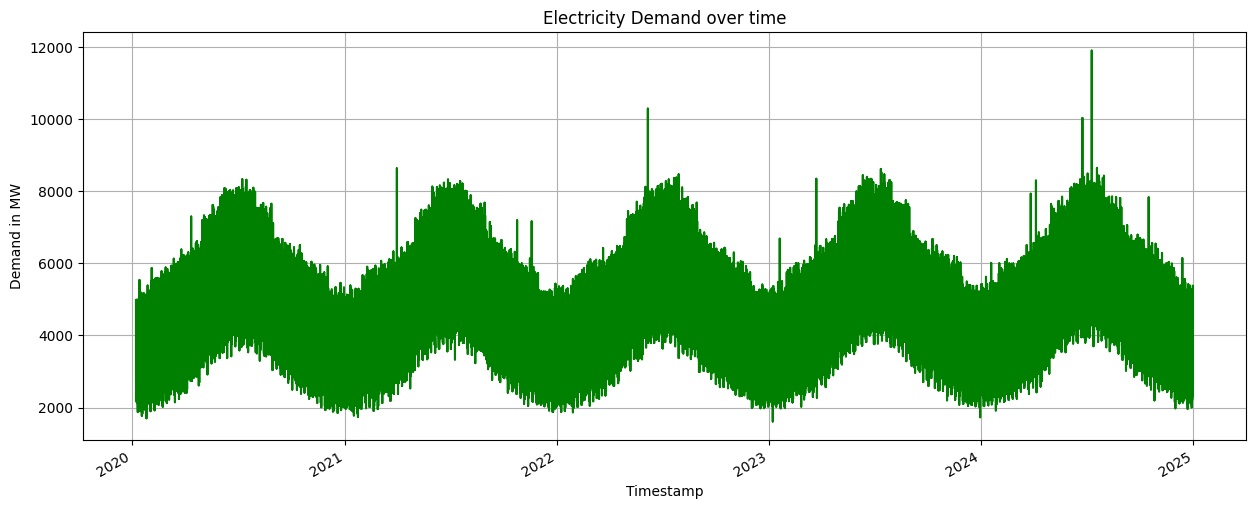

In [134]:
df['Demand'].plot(figsize=(15,6), title='Electricity Demand over time', color='green')
plt.xlabel('Timestamp')
plt.ylabel('Demand in MW')
plt.grid()
plt.show()

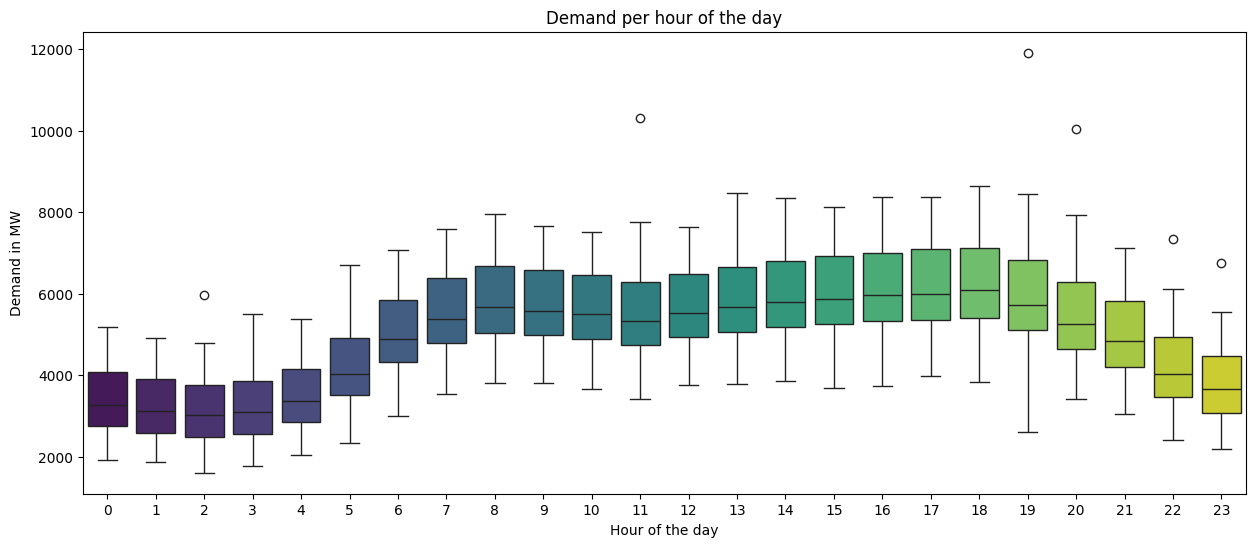

In [142]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df, x='hour', y='Demand', palette='viridis')
plt.title('Demand per hour of the day')
plt.xlabel('Hour of the day')
plt.ylabel('Demand in MW')
plt.show()

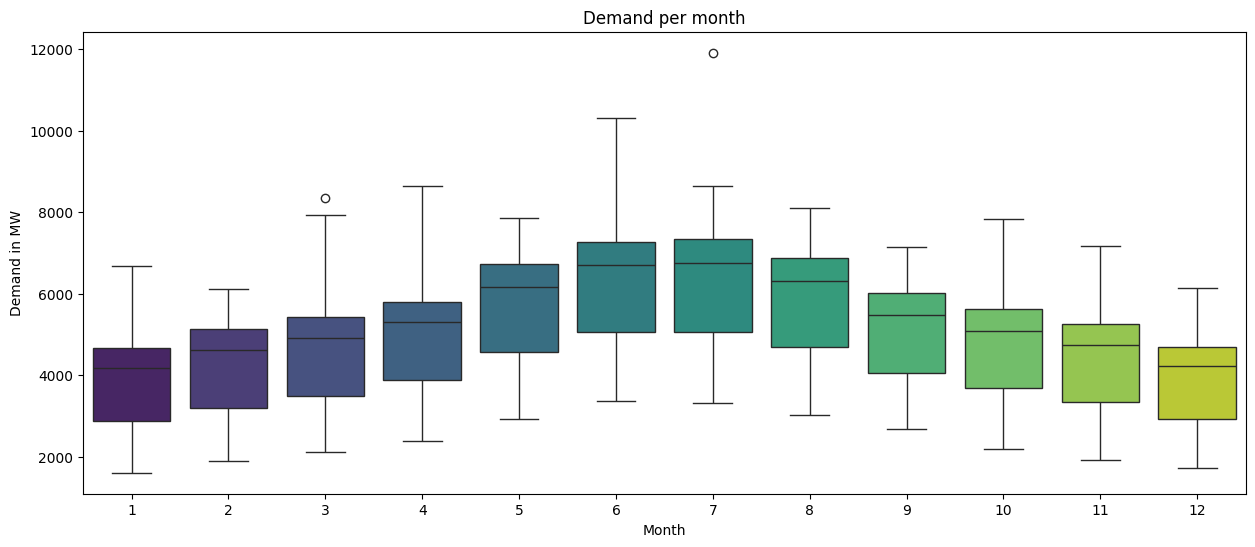

In [141]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df, x='month', y='Demand', palette='viridis')
plt.title('Demand per month')
plt.xlabel('Month')
plt.ylabel('Demand in MW')
plt.show()

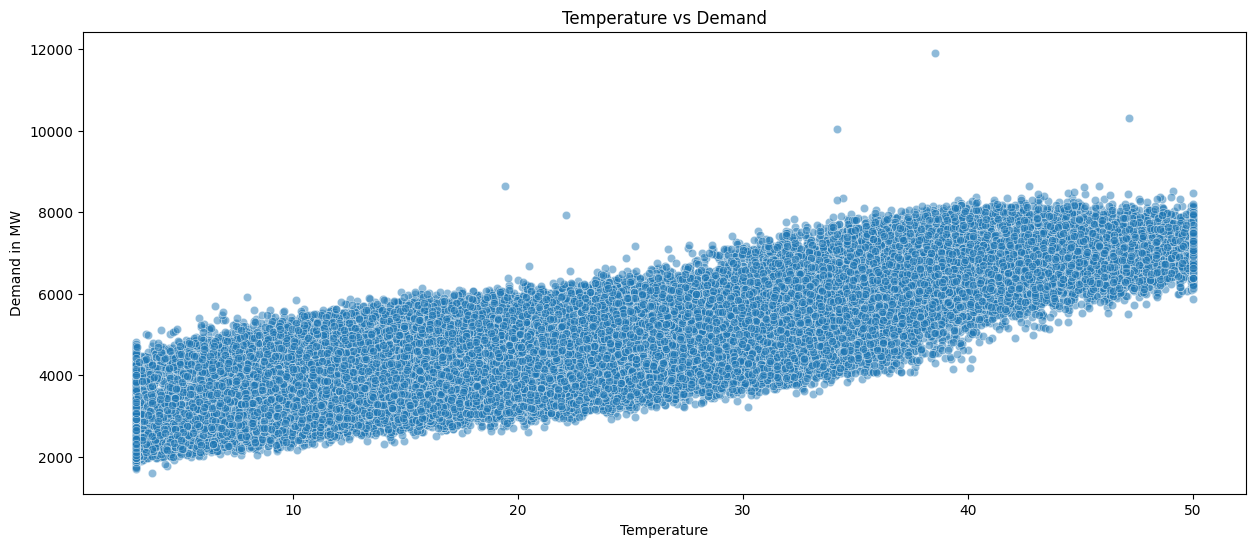

In [143]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=df, x='Temperature', y='Demand', palette='viridis', alpha=0.5)
plt.title('Temperature vs Demand')
plt.xlabel('Temperature')
plt.ylabel('Demand in MW')
plt.show()

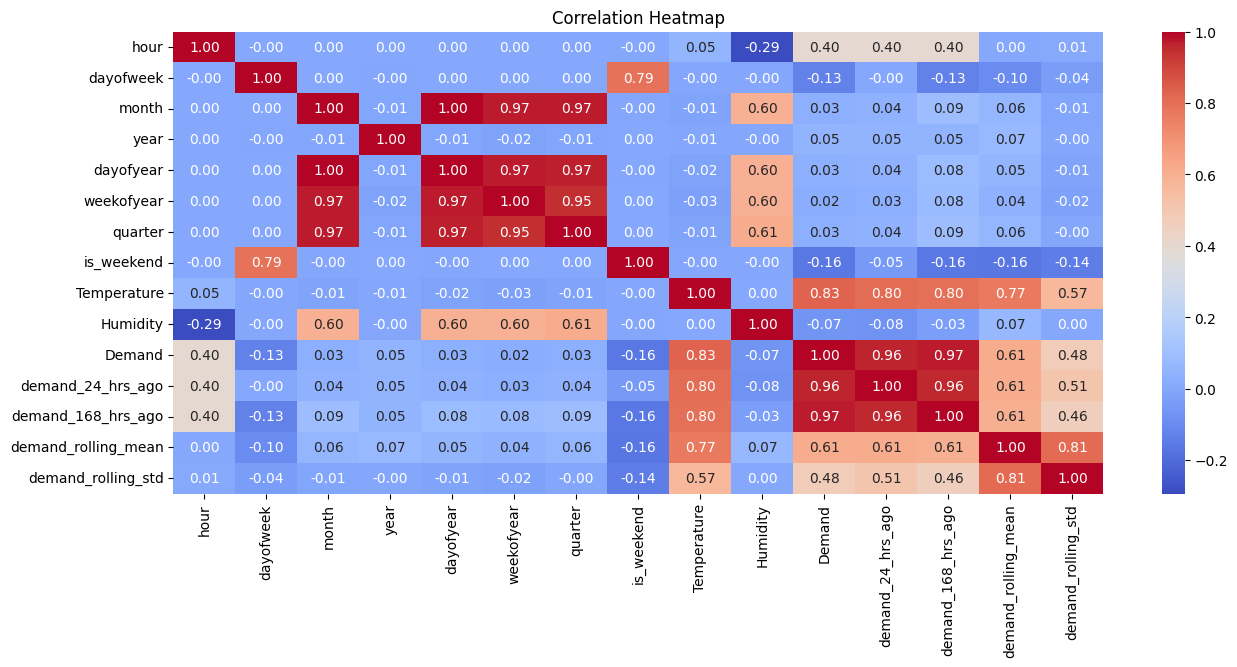

In [146]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

- Modelling

In [147]:
df.head()

,hour,dayofweek,month,year,dayofyear,weekofyear,quarter,is_weekend,Temperature,Humidity,Demand,demand_24_hrs_ago,demand_168_hrs_ago,demand_rolling_mean,demand_rolling_std
Timestamp,,,,,,,,,,,,,,,
2020-01-08,0,2,1,2020,8,2,1,0,3.000000,47.891592,2363.060115,2216.875986,2457.119872,3857.890516,1007.130968
2020-01-08,1,2,1,2020,8,2,1,0,4.433666,61.209727,2282.558766,2400.102433,2269.904712,3852.992863,1014.785101
2020-01-08,2,2,1,2020,8,2,1,0,5.000529,63.868618,2193.324174,2493.107375,2215.640403,3840.501897,1033.916351
2020-01-08,3,2,1,2020,8,2,1,0,4.253477,44.603210,2208.724679,2241.451559,2174.232413,3839.138277,1036.136212
2020-01-08,4,2,1,2020,8,2,1,0,5.966044,85.921008,2402.611018,2406.161001,2472.453006,3838.990361,1036.349905


In [150]:
y = df['Demand']
X = df.drop(columns=['Demand'], axis=1)

In [151]:
X

,hour,dayofweek,month,year,dayofyear,weekofyear,quarter,is_weekend,Temperature,Humidity,demand_24_hrs_ago,demand_168_hrs_ago,demand_rolling_mean,demand_rolling_std
Timestamp,,,,,,,,,,,,,,
2020-01-08,0,2,1,2020,8,2,1,0,3.000000,47.891592,2216.875986,2457.119872,3857.890516,1007.130968
2020-01-08,1,2,1,2020,8,2,1,0,4.433666,61.209727,2400.102433,2269.904712,3852.992863,1014.785101
2020-01-08,2,2,1,2020,8,2,1,0,5.000529,63.868618,2493.107375,2215.640403,3840.501897,1033.916351
2020-01-08,3,2,1,2020,8,2,1,0,4.253477,44.603210,2241.451559,2174.232413,3839.138277,1036.136212
2020-01-08,4,2,1,2020,8,2,1,0,5.966044,85.921008,2406.161001,2472.453006,3838.990361,1036.349905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,19,1,12,2024,366,1,4,0,3.956838,43.287161,5102.077310,5105.730509,4039.969992,976.961312
2024-12-31,20,1,12,2024,366,1,4,0,3.118824,51.705756,4187.844204,4673.672173,4045.945201,978.342615
2024-12-31,21,1,12,2024,366,1,4,0,3.000000,40.565916,3859.260701,3856.359014,4052.475170,977.565114


In [152]:
y

,Demand
Timestamp,
2020-01-08,2363.060115
2020-01-08,2282.558766
2020-01-08,2193.324174
2020-01-08,2208.724679
2020-01-08,2402.611018
...,...
2024-12-31,4689.693109
2024-12-31,4331.249224
2024-12-31,4015.979957


- from sklearn.model_selection import train_test_split
- X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
- since this is time based data , so split in a such way as it can't have future values.

# 80%

In [153]:
X_train = X.loc[:'2023-12-31']
X_train

,hour,dayofweek,month,year,dayofyear,weekofyear,quarter,is_weekend,Temperature,Humidity,demand_24_hrs_ago,demand_168_hrs_ago,demand_rolling_mean,demand_rolling_std
Timestamp,,,,,,,,,,,,,,
2020-01-08,0,2,1,2020,8,2,1,0,3.000000,47.891592,2216.875986,2457.119872,3857.890516,1007.130968
2020-01-08,1,2,1,2020,8,2,1,0,4.433666,61.209727,2400.102433,2269.904712,3852.992863,1014.785101
2020-01-08,2,2,1,2020,8,2,1,0,5.000529,63.868618,2493.107375,2215.640403,3840.501897,1033.916351
2020-01-08,3,2,1,2020,8,2,1,0,4.253477,44.603210,2241.451559,2174.232413,3839.138277,1036.136212
2020-01-08,4,2,1,2020,8,2,1,0,5.966044,85.921008,2406.161001,2472.453006,3838.990361,1036.349905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31,19,6,12,2023,365,52,4,1,6.721774,46.627264,3894.908251,3840.654680,3597.790591,879.089476
2023-12-31,20,6,12,2023,365,52,4,1,7.557696,58.505012,3797.287793,4122.218903,3599.126925,879.430235
2023-12-31,21,6,12,2023,365,52,4,1,3.000000,48.001079,3280.602315,3307.887152,3604.785551,877.726873


In [154]:
y_train = y.loc[:'2023-12-31']
y_train

,Demand
Timestamp,
2020-01-08,2363.060115
2020-01-08,2282.558766
2020-01-08,2193.324174
2020-01-08,2208.724679
2020-01-08,2402.611018
...,...
2023-12-31,4185.721624
2023-12-31,3829.359810
2023-12-31,3416.409325


- 20%

In [155]:
X_test = X.loc['2024-01-01':]
X_test

,hour,dayofweek,month,year,dayofyear,weekofyear,quarter,is_weekend,Temperature,Humidity,demand_24_hrs_ago,demand_168_hrs_ago,demand_rolling_mean,demand_rolling_std
Timestamp,,,,,,,,,,,,,,
2024-01-01,0,0,1,2024,1,1,1,0,3.000000,65.297046,2373.967493,2752.003113,3626.185642,856.204515
2024-01-01,1,0,1,2024,1,1,1,0,3.000000,69.068654,2328.972904,2419.747602,3640.380403,836.357296
2024-01-01,2,0,1,2024,1,1,1,0,3.000000,80.885372,1729.176090,2292.834087,3669.813854,776.458065
2024-01-01,3,0,1,2024,1,1,1,0,7.788675,66.501527,2257.337352,2507.704476,3685.801618,749.595470
2024-01-01,4,0,1,2024,1,1,1,0,6.607828,57.858109,2516.948873,2690.933257,3692.926651,738.736316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31,19,1,12,2024,366,1,4,0,3.956838,43.287161,5102.077310,5105.730509,4039.969992,976.961312
2024-12-31,20,1,12,2024,366,1,4,0,3.118824,51.705756,4187.844204,4673.672173,4045.945201,978.342615
2024-12-31,21,1,12,2024,366,1,4,0,3.000000,40.565916,3859.260701,3856.359014,4052.475170,977.565114


In [156]:
y_test = y.loc['2024-01-01':]
y_test

,Demand
Timestamp,
2024-01-01,2720.606072
2024-01-01,2669.647167
2024-01-01,2435.578924
2024-01-01,2641.043699
2024-01-01,2687.949643
...,...
2024-12-31,4689.693109
2024-12-31,4331.249224
2024-12-31,4015.979957


In [157]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(34892, 14) (8784, 14) (34892,) (8784,)


- XGBoost

In [158]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import TimeSeriesSplit

In [159]:
model_xgb = XGBRegressor(n_estimators=1000,
                         early_stopping_rounds=50,
                         learning_rate=0.01,
                         random_state=42,
                         objective='reg:squarederror',
                         n_jobs=-1,
                         )

In [160]:
model_xgb.fit(X_train, y_train, eval_set=[(X_train, y_train),(X_test,y_test)], verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=-1, num_parallel_tree=None, ...)

In [161]:
# make predictions

predictions_xgb = model_xgb.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions_xgb))
mae = mean_absolute_error(y_test, predictions_xgb)
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")


RMSE: 175.23
MAE: 123.48


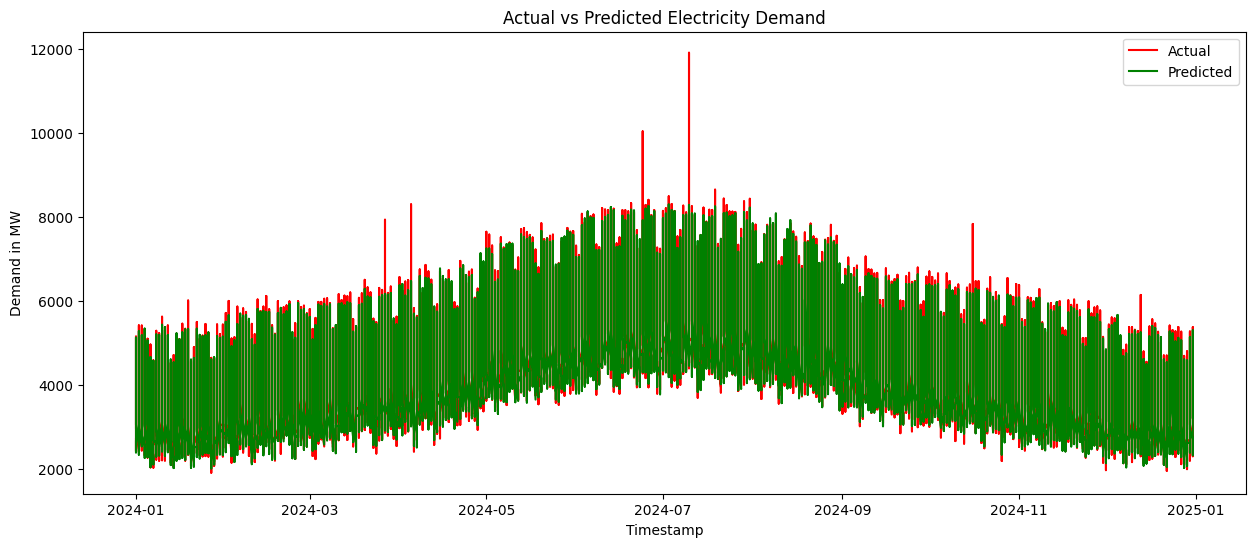

In [165]:
# prediction of visualization

plt.figure(figsize=(15,6))
plt.plot(y_test.index, y_test.values, label='Actual', color='red')
plt.plot(y_test.index, predictions_xgb, label='Predicted', color='green')
plt.title('Actual vs Predicted Electricity Demand')
plt.xlabel('Timestamp')
plt.ylabel('Demand in MW')
plt.legend()
plt.show()

In [ ]:
# import joblib
# joblib.dump(model_xgb, 'electricity_xgb_model.pkl')